# Importing Dependencies

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train Test Split Data

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Data Sample

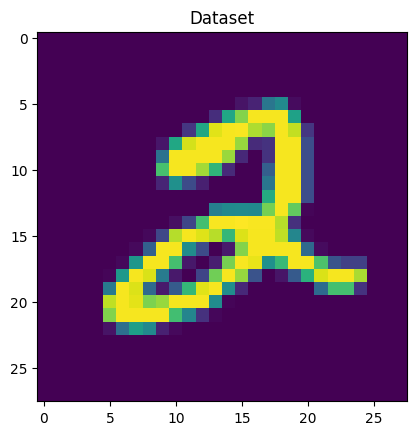

In [23]:
plt.imshow(x_train[5])
plt.title('Dataset')
plt.show()

# Model Creation

In [4]:
x_train = x_train/255.0 #make features in range
x_test = x_test/255.0

In [8]:
#model_creation
model = tf.keras.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model Summary

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam',)

## Model Fit/Training

In [15]:
model.fit(x_train, y_train, epochs = 20,validation_split = 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0125 - val_loss: 0.1101
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0114 - val_loss: 0.1145
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0095 - val_loss: 0.1143
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0076 - val_loss: 0.1082
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0068 - val_loss: 0.1263
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0061 - val_loss: 0.1439
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0079 - val_loss: 0.1168
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0046 - val_loss: 0.1239
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0052 - val_loss: 0.1215
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0032 - val_loss: 0.1332
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0054 - val_loss: 0.1239
Epoch 12/20
1500/1500 ━━━━━━━

# Predictions

In [16]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
pred = pred.argmax(axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
pred[0]

7

## Accuracy Score

In [19]:
accuracy_score(y_test,pred)

0.9771

# Testing

Enter the Index you want to Check: 1


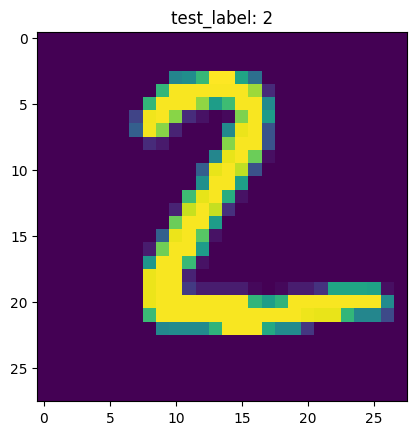

In [28]:
in_ = int(input('Enter the Index you want to Check: '))
plt.imshow(x_test[in_])
plt.title(f"test_label: {y_test[in_]}")
plt.show()
